In [1]:
import deeplabcut
import tensorflow as tf
import tensorrt as trt

print("TensorFlow version:", tf.__version__)
print("CUDA version:", tf.sysconfig.get_build_info()["cuda_version"])
print("cuDNN version:", tf.sysconfig.get_build_info()["cudnn_version"])
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print(trt.__version__)

2024-05-18 18:09:33.397556: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-18 18:09:33.424642: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Loading DLC 2.3.9...
TensorFlow version: 2.12.0
CUDA version: 11.8
cuDNN version: 8
Num GPUs Available:  1
10.0.1


2024-05-18 18:09:35.900823: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-18 18:09:35.937418: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-18 18:09:35.937449: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.


In [4]:
# only using experiment ONE to see how strongly it generalizes
deeplabcut.create_new_project('Moused', 'David', ['/home/box/coding/CTIR/videos/experiment_1/E1_front.avi', '/home/box/coding/CTIR/videos/experiment_1/E1_side.avi', '/home/box/coding/CTIR/videos/experiment_1/E1_top.avi',
                                                '/home/box/coding/CTIR/videos/experiment_2/E2_front.avi','/home/box/coding/CTIR/videos/experiment_2/E2_side.avi','/home/box/coding/CTIR/videos/experiment_2/E2_top.avi'])
config_path = '/home/box/coding/CTIR/Moused-David-2024-05-18/config.yaml'

Created "/home/box/coding/CTIR/Moused-David-2024-05-18/videos"
Created "/home/box/coding/CTIR/Moused-David-2024-05-18/labeled-data"
Created "/home/box/coding/CTIR/Moused-David-2024-05-18/training-datasets"
Created "/home/box/coding/CTIR/Moused-David-2024-05-18/dlc-models"
Attempting to create a symbolic link of the video ...
Created the symlink of /home/box/coding/CTIR/videos/experiment_1/E1_front.avi to /home/box/coding/CTIR/Moused-David-2024-05-18/videos/E1_front.avi
Created the symlink of /home/box/coding/CTIR/videos/experiment_1/E1_side.avi to /home/box/coding/CTIR/Moused-David-2024-05-18/videos/E1_side.avi
Created the symlink of /home/box/coding/CTIR/videos/experiment_1/E1_top.avi to /home/box/coding/CTIR/Moused-David-2024-05-18/videos/E1_top.avi
Created the symlink of /home/box/coding/CTIR/videos/experiment_2/E2_front.avi to /home/box/coding/CTIR/Moused-David-2024-05-18/videos/E2_front.avi
Created the symlink of /home/box/coding/CTIR/videos/experiment_2/E2_side.avi to /home/box/c

# adapt the config yaml
- bodyparts:
    - nose
    - ear_left
    - ear_right
    - eye_left
    - eye_right
    - paw_front_right
    - paw_front_left
    - paw_hind_right
    - paw_hind_left
    - tail_base
    - lever_tip
    - upper_lever_tip
    - stick_head
    - ball
    - sliding_door
- numframes2pick
    - 30; increase later if tracker not working well

In [27]:
deeplabcut.extract_frames(config_path, algo='uniform', userfeedback=False)

Config file read successfully.
Extracting frames based on uniform ...
Uniformly extracting of frames from 0.0  seconds to 555.0  seconds.
Extracting frames based on uniform ...
Uniformly extracting of frames from 0.0  seconds to 555.0  seconds.
Extracting frames based on uniform ...
Uniformly extracting of frames from 0.0  seconds to 555.0  seconds.
Extracting frames based on uniform ...
Uniformly extracting of frames from 0.0  seconds to 645.0  seconds.
Extracting frames based on uniform ...
Uniformly extracting of frames from 0.0  seconds to 645.0  seconds.
Extracting frames based on uniform ...
Uniformly extracting of frames from 0.0  seconds to 645.0  seconds.
Frames were successfully extracted, for the videos listed in the config.yaml file.

You can now label the frames using the function 'label_frames' (Note, you should label frames extracted from diverse videos (and many videos; we do not recommend training on single videos!)).


- When selecting frames to label:
    - variety of poses
    - body part visibility
    - activity diverstiy
    - temporal distribution
    - clear images
    - different light conditions

In [34]:
deeplabcut.label_frames(config_path)

/home/box/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/napari/_qt/qt_viewer.py:424: UserWarning: Attempting to unbind an action which does not exists (napari:cycle_through_color_modes), this may have no effects. This can happen if your settings are out of date, if you upgraded napari, upgraded or deactivated a plugin, or made a typo in in your custom keybinding.
  action_manager.unbind_shortcut(action)


In [37]:
# There are many more functions you can set here, including which network to use. Check the docstring for full options you can do!
deeplabcut.create_training_dataset(config_path, net_type='resnet_50', augmenter_type='imgaug')

The training dataset is successfully created. Use the function 'train_network' to start training. Happy training!


[(0.9,
  1,
  (array([22, 11, 16,  6, 26, 14,  9, 20, 25, 28, 10, 23, 24, 36,  1, 27,  5,
          39, 34, 19,  8,  7, 17,  4, 37,  3, 13, 31, 29, 38, 21, 32,  0, 18,
          33,  2]),
   array([35, 30, 15, 12])))]

In [38]:
deeplabcut.train_network(config_path, displayiters=300,saveiters=5000, maxiters=15000)

Config:
{'all_joints': [[0], [1], [2], [3], [4], [5], [6], [7], [8]],
 'all_joints_names': ['nose',
                      'ear_left',
                      'ear_right',
                      'tail_base',
                      'lever_tip',
                      'upper_lever_tip',
                      'stick_head',
                      'ball',
                      'sliding_door'],
 'alpha_r': 0.02,
 'apply_prob': 0.5,
 'batch_size': 1,
 'contrast': {'clahe': True,
              'claheratio': 0.1,
              'histeq': True,
              'histeqratio': 0.1},
 'convolution': {'edge': False,
                 'emboss': {'alpha': [0.0, 1.0], 'strength': [0.5, 1.5]},
                 'embossratio': 0.1,
                 'sharpen': False,
                 'sharpenratio': 0.3},
 'crop_pad': 0,
 'cropratio': 0.4,
 'dataset': 'training-datasets/iteration-0/UnaugmentedDataSet_MousedMay18/Moused_David90shuffle1.mat',
 'dataset_type': 'imgaug',
 'decay_steps': 30000,
 'deterministic': False,
 '

Selecting single-animal trainer
Batch Size is 1


/home/box/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


Loading ImageNet-pretrained resnet_50


2024-05-19 10:32:32.834854: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-19 10:32:32.834957: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-19 10:32:32.834989: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-19 10:32:32.835307: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-19 10:32:32.835320: I tensorflow/core/co

Max_iters overwritten as 15000
Display_iters overwritten as 300
Save_iters overwritten as 5000
Training parameter:
{'stride': 8.0, 'weigh_part_predictions': False, 'weigh_negatives': False, 'fg_fraction': 0.25, 'mean_pixel': [123.68, 116.779, 103.939], 'shuffle': True, 'snapshot_prefix': '/home/box/coding/CTIR/Moused-David-2024-05-18/dlc-models/iteration-0/MousedMay18-trainset90shuffle1/train/snapshot', 'log_dir': 'log', 'global_scale': 0.8, 'location_refinement': True, 'locref_stdev': 7.2801, 'locref_loss_weight': 0.05, 'locref_huber_loss': True, 'optimizer': 'sgd', 'intermediate_supervision': False, 'intermediate_supervision_layer': 12, 'regularize': False, 'weight_decay': 0.0001, 'crop_pad': 0, 'scoremap_dir': 'test', 'batch_size': 1, 'dataset_type': 'imgaug', 'deterministic': False, 'mirror': False, 'pairwise_huber_loss': False, 'weigh_only_present_joints': False, 'partaffinityfield_predict': False, 'pairwise_predict': False, 'all_joints': [[0], [1], [2], [3], [4], [5], [6], [7], [

iteration: 300 loss: 0.0421 lr: 0.005
iteration: 600 loss: 0.0244 lr: 0.005
iteration: 900 loss: 0.0224 lr: 0.005
iteration: 1200 loss: 0.0211 lr: 0.005
iteration: 1500 loss: 0.0196 lr: 0.005
iteration: 1800 loss: 0.0186 lr: 0.005
iteration: 2100 loss: 0.0175 lr: 0.005
iteration: 2400 loss: 0.0164 lr: 0.005
iteration: 2700 loss: 0.0156 lr: 0.005
iteration: 3000 loss: 0.0148 lr: 0.005
iteration: 3300 loss: 0.0142 lr: 0.005
iteration: 3600 loss: 0.0135 lr: 0.005
iteration: 3900 loss: 0.0126 lr: 0.005
iteration: 4200 loss: 0.0123 lr: 0.005
iteration: 4500 loss: 0.0121 lr: 0.005
iteration: 4800 loss: 0.0113 lr: 0.005
iteration: 5100 loss: 0.0110 lr: 0.005
iteration: 5400 loss: 0.0108 lr: 0.005
iteration: 5700 loss: 0.0107 lr: 0.005
iteration: 6000 loss: 0.0104 lr: 0.005
iteration: 6300 loss: 0.0101 lr: 0.005
iteration: 6600 loss: 0.0096 lr: 0.005
iteration: 6900 loss: 0.0094 lr: 0.005
iteration: 7200 loss: 0.0091 lr: 0.005
iteration: 7500 loss: 0.0091 lr: 0.005
iteration: 7800 loss: 0.0084

The network is now trained and ready to evaluate. Use the function 'evaluate_network' to evaluate the network.


Config:
{'all_joints': [[0], [1], [2], [3], [4], [5], [6], [7], [8]],
 'all_joints_names': ['nose',
                      'ear_left',
                      'ear_right',
                      'tail_base',
                      'lever_tip',
                      'upper_lever_tip',
                      'stick_head',
                      'ball',
                      'sliding_door'],
 'batch_size': 1,
 'crop_pad': 0,
 'dataset': 'training-datasets/iteration-0/UnaugmentedDataSet_MousedMay18/Moused_David90shuffle1.mat',
 'dataset_type': 'imgaug',
 'deterministic': False,
 'fg_fraction': 0.25,
 'global_scale': 0.8,
 'init_weights': '/home/box/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/deeplabcut/pose_estimation_tensorflow/models/pretrained/resnet_v1_50.ckpt',
 'intermediate_supervision': False,
 'intermediate_supervision_layer': 12,
 'location_refinement': True,
 'locref_huber_loss': True,
 'locref_loss_weight': 1.0,
 'locref_stdev': 7.2801,
 'log_dir': 'log',
 'mean_pixel': [123

Running  DLC_resnet50_MousedMay18shuffle1_15000  with # of training iterations: 15000


2024-05-19 10:51:04.665553: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-19 10:51:04.665668: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-19 10:51:04.665683: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-19 10:51:04.665924: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-19 10:51:04.665957: I tensorflow/core/co

Running evaluation ...


40it [00:01, 25.92it/s]


Analysis is done and the results are stored (see evaluation-results) for snapshot:  snapshot-15000
Results for 15000  training iterations: 90 1 train error: 9.19 pixels. Test error: 67.89  pixels.
With pcutoff of 0.6  train error: 9.08 pixels. Test error: 58.34 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Plotting...


100%|██████████| 40/40 [00:07<00:00,  5.66it/s]

The network is evaluated and the results are stored in the subdirectory 'evaluation_results'.
Please check the results, then choose the best model (snapshot) for prediction. You can update the config.yaml file with the appropriate index for the 'snapshotindex'.
Use the function 'analyze_video' to make predictions on new videos.
Otherwise, consider adding more labeled-data and retraining the network (see DeepLabCut workflow Fig 2, Nath 2019)


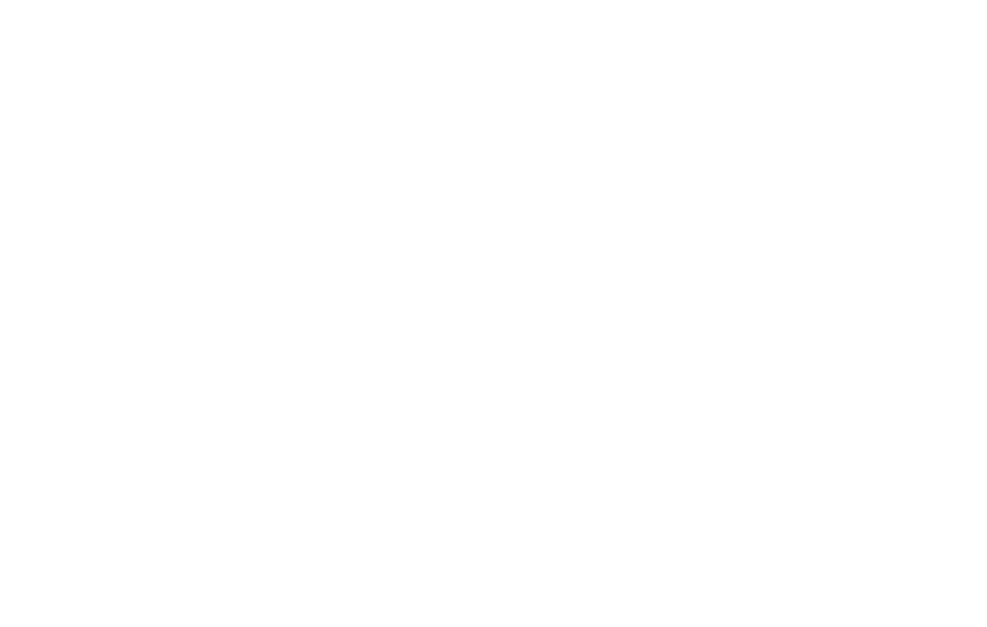

In [39]:
deeplabcut.evaluate_network(config_path,plotting=True)

In [42]:
video_path = '/home/box/coding/CTIR/videos/experiment_1/E1_top.avi'
video_paths = ['/home/box/coding/CTIR/videos/experiment_1/E1_side.avi','/home/box/coding/CTIR/videos/experiment_1/E1_front.avi','/home/box/coding/CTIR/videos/experiment_1/E1_top.avi',
               '/home/box/coding/CTIR/videos/experiment_2/E2_side.avi','/home/box/coding/CTIR/videos/experiment_2/E2_front.avi','/home/box/coding/CTIR/videos/experiment_2/E2_top.avi']

In [43]:
deeplabcut.analyze_videos(config_path,video_path)
deeplabcut.create_labeled_video(config_path,video_path)

Config:
{'all_joints': [[0], [1], [2], [3], [4], [5], [6], [7], [8]],
 'all_joints_names': ['nose',
                      'ear_left',
                      'ear_right',
                      'tail_base',
                      'lever_tip',
                      'upper_lever_tip',
                      'stick_head',
                      'ball',
                      'sliding_door'],
 'batch_size': 1,
 'crop_pad': 0,
 'dataset': 'training-datasets/iteration-0/UnaugmentedDataSet_MousedMay18/Moused_David90shuffle1.mat',
 'dataset_type': 'imgaug',
 'deterministic': False,
 'fg_fraction': 0.25,
 'global_scale': 0.8,
 'init_weights': '/home/box/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/deeplabcut/pose_estimation_tensorflow/models/pretrained/resnet_v1_50.ckpt',
 'intermediate_supervision': False,
 'intermediate_supervision_layer': 12,
 'location_refinement': True,
 'locref_huber_loss': True,
 'locref_loss_weight': 1.0,
 'locref_stdev': 7.2801,
 'log_dir': 'log',
 'mean_pixel': [123

/home/box/anaconda3/envs/DEEPLABCUT/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


Using snapshot-15000 for model /home/box/coding/CTIR/Moused-David-2024-05-18/dlc-models/iteration-0/MousedMay18-trainset90shuffle1


2024-05-19 11:05:01.988321: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-19 11:05:01.988394: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-19 11:05:01.988407: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-19 11:05:01.988701: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-19 11:05:01.988711: I tensorflow/core/co

Starting to analyze %  /home/box/coding/CTIR/videos/experiment_1/E1_front.avi
Loading  /home/box/coding/CTIR/videos/experiment_1/E1_front.avi
Duration of video [s]:  555.0 , recorded with  30.0 fps!
Overall # of frames:  16650  found with (before cropping) frame dimensions:  968 608
Starting to extract posture


100%|██████████| 16650/16650 [03:29<00:00, 79.43it/s]

Saving results in /home/box/coding/CTIR/videos/experiment_1...
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.


Starting to process video: /home/box/coding/CTIR/videos/experiment_1/E1_front.avi
Loading /home/box/coding/CTIR/videos/experiment_1/E1_front.avi and data.
Duration of video [s]: 555.0, recorded with 30.0 fps!
Overall # of frames: 16650 with cropped frame dimensions: 968 608
Generating frames and creating video.


100%|██████████| 16650/16650 [01:04<00:00, 256.37it/s]


[True]